 Sampling Methods:
 ================
 1) Probability Sampling: In this type every element of the population has an equal chance of being selected.
 
 2) Non-Probability Sampling : Here all elements do not have an equal chance of being selected.
 
 Types of Probability Sampling:
 =========================
 1) Simple Random Sampling: Here, every individual is chosen entirely by chance and each member of the population has an equal      chance of being selected.
    
    One disadvantage is it may not select enough individuals with our characteristics of interest.
 
 2) Systematic Sampling: In this type of sampling, the first individual is selected randomly and others are selected using a        fixed ‘sampling interval’.
    
    Say our population size is x and we have to select a sample size of n. Then, the next individual that we will select would     be x/nth intervals away from the first individual. We can select the rest in the same way.
 
 3) Stratified Sampling: In this type of sampling, we divide the population into subgroups (called strata) based on different        traits like gender, category, etc. and then we select the sample(s) from these subgroups.
    
    We use this type of sampling when we want representation from all the subgroups of the population.
    
 4) Cluster Sampling: In a clustered sample, we use the subgroups of the population as the sampling unit rather than                individuals. 
    
    The population is divided into subgroups, known as clusters, and a whole cluster is randomly selected to be included in the     study.
    
    This type of sampling is used when we focus on a specific region or area.
    



Sampling is also done widely when there exists any ClassImbalance in the dataset i.e the presence of one level in target variable isfar more than the other .
In that case we use Under-sampling or Over-sampling technique.

In [30]:
# Loading the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.utils import resample

In [2]:

# Loading the dataset

data = pd.read_csv("E:\\Amit GitHub\\Data.csv")

In [3]:
# Viewing the dataset

data.head()

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,TARGET
0,M,Working,Secondary / secondary special,Single / not married,9461,637,3648.0,2120,1,0,1,Laborers,0,0,Business Entity Type 3,1134,1
1,F,State servant,Higher education,Married,16765,1188,1186.0,291,1,0,1,Core staff,0,0,School,828,0
2,F,Working,Secondary / secondary special,Civil marriage,19005,3039,9833.0,2437,1,0,0,Laborers,0,0,Business Entity Type 3,617,0
3,M,Working,Secondary / secondary special,Single / not married,19932,3038,4311.0,3458,1,0,0,Core staff,0,1,Religion,1106,0
4,M,State servant,Secondary / secondary special,Married,16941,1588,4970.0,477,1,1,1,Laborers,0,0,Other,2536,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278232 entries, 0 to 278231
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CODE_GENDER             278232 non-null  object 
 1   NAME_INCOME_TYPE        278232 non-null  object 
 2   NAME_EDUCATION_TYPE     278232 non-null  object 
 3   NAME_FAMILY_STATUS      278232 non-null  object 
 4   DAYS_BIRTH              278232 non-null  int64  
 5   DAYS_EMPLOYED           278232 non-null  int64  
 6   DAYS_REGISTRATION       278232 non-null  float64
 7   DAYS_ID_PUBLISH         278232 non-null  int64  
 8   FLAG_EMP_PHONE          278232 non-null  int64  
 9   FLAG_WORK_PHONE         278232 non-null  int64  
 10  FLAG_PHONE              278232 non-null  int64  
 11  OCCUPATION_TYPE         189432 non-null  object 
 12  REG_CITY_NOT_LIVE_CITY  278232 non-null  int64  
 13  REG_CITY_NOT_WORK_CITY  278232 non-null  int64  
 14  ORGANIZATION_TYPE   

In [23]:
numerical_features = [
    f for f in data.columns if data[f].dtype != 'object'
]

In [8]:
numerical_features

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'TARGET']

In [12]:
numerical_data = pd.DataFrame(data,columns=numerical_features)

In [13]:
numerical_data.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,TARGET
0,9461,637,3648.0,2120,1,0,1,0,0,1134,1
1,16765,1188,1186.0,291,1,0,1,0,0,828,0
2,19005,3039,9833.0,2437,1,0,0,0,0,617,0
3,19932,3038,4311.0,3458,1,0,0,0,1,1106,0
4,16941,1588,4970.0,477,1,1,1,0,0,2536,0


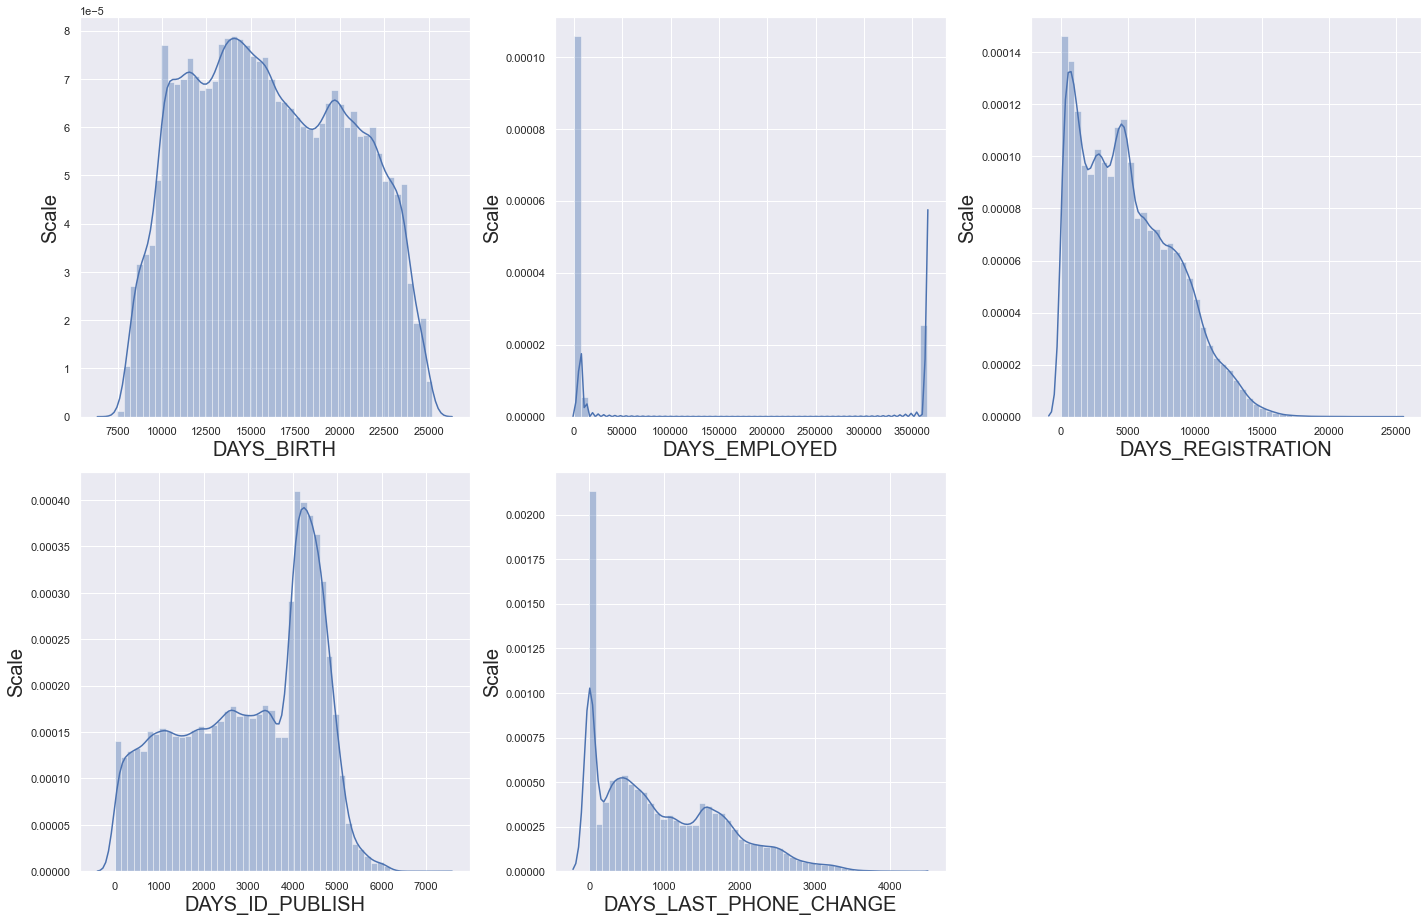

In [24]:
# To view how data is distributed for every column without Target and other binary columns

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_data.drop(['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','TARGET'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(numerical_data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Scale',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
# Before sampling

data["TARGET"].value_counts()

0    255011
1     23221
Name: TARGET, dtype: int64

In [37]:
# Example with upsampling

# separate minority and majority classes
majority = data[data.TARGET==0]
minority = data[data.TARGET==1]


data_upsampled = resample(minority,
                          replace=True, # sample with replacement
                          n_samples=len(majority), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([majority,data_upsampled])

# After upsampling
upsampled["TARGET"].value_counts()

1    255011
0    255011
Name: TARGET, dtype: int64

In [38]:
# Example with downsampling

# separate minority and majority classes
majority = data[data.TARGET==0]
minority = data[data.TARGET==1]


data_downsampled = resample(majority,
                          replace=False, # sample with replacement
                          n_samples=len(minority), # match number in minority class
                          random_state=27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([minority,data_downsampled])

# After downsampling
downsampled["TARGET"].value_counts()

1    23221
0    23221
Name: TARGET, dtype: int64